# Explore here

Importación de librerías

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from pickle import dump

Carga de datos

In [37]:

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [39]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())

In [40]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [41]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std    

In [42]:
#df = df[df['Pregnancies'] <= 12]
#df = df[(df['Glucose']>=70) & (df['Glucose'] <=140)]
#df = df[(df['BloodPressure'] >= 70) & (df['BloodPressure'] <= 120)]
#df = df[(df['SkinThickness'] >= 10) & (df['SkinThickness'] <= 60)]
#df = df[df['Insulin'] <= 400] 
#df = df[(df['BMI'] >= 18.5) & (df['BMI'] <= 40)]     
#df = df[df['DiabetesPedigreeFunction'] <= 2]
#df = df[(df['Age'] >= 20) & (df['Age'] <= 80)]
df = df[(df['Insulin'] >= 15) & (df['Insulin'] <= 400)]  # mantener valores fisiológicamente válidos

# SkinThickness: eliminar ceros y valores extremos (alta correlación con BMI pero baja con Outcome)
df = df[(df['SkinThickness'] >= 10) & (df['SkinThickness'] <= 60)]

# DiabetesPedigreeFunction: valores > 2 son outliers raros sin mucha correlación con Outcome
df = df[df['DiabetesPedigreeFunction'] <= 2]

In [43]:
print("Número de personas con y sin diabetes:")
print(df["Outcome"].value_counts())

Número de personas con y sin diabetes:
Outcome
0    489
1    252
Name: count, dtype: int64


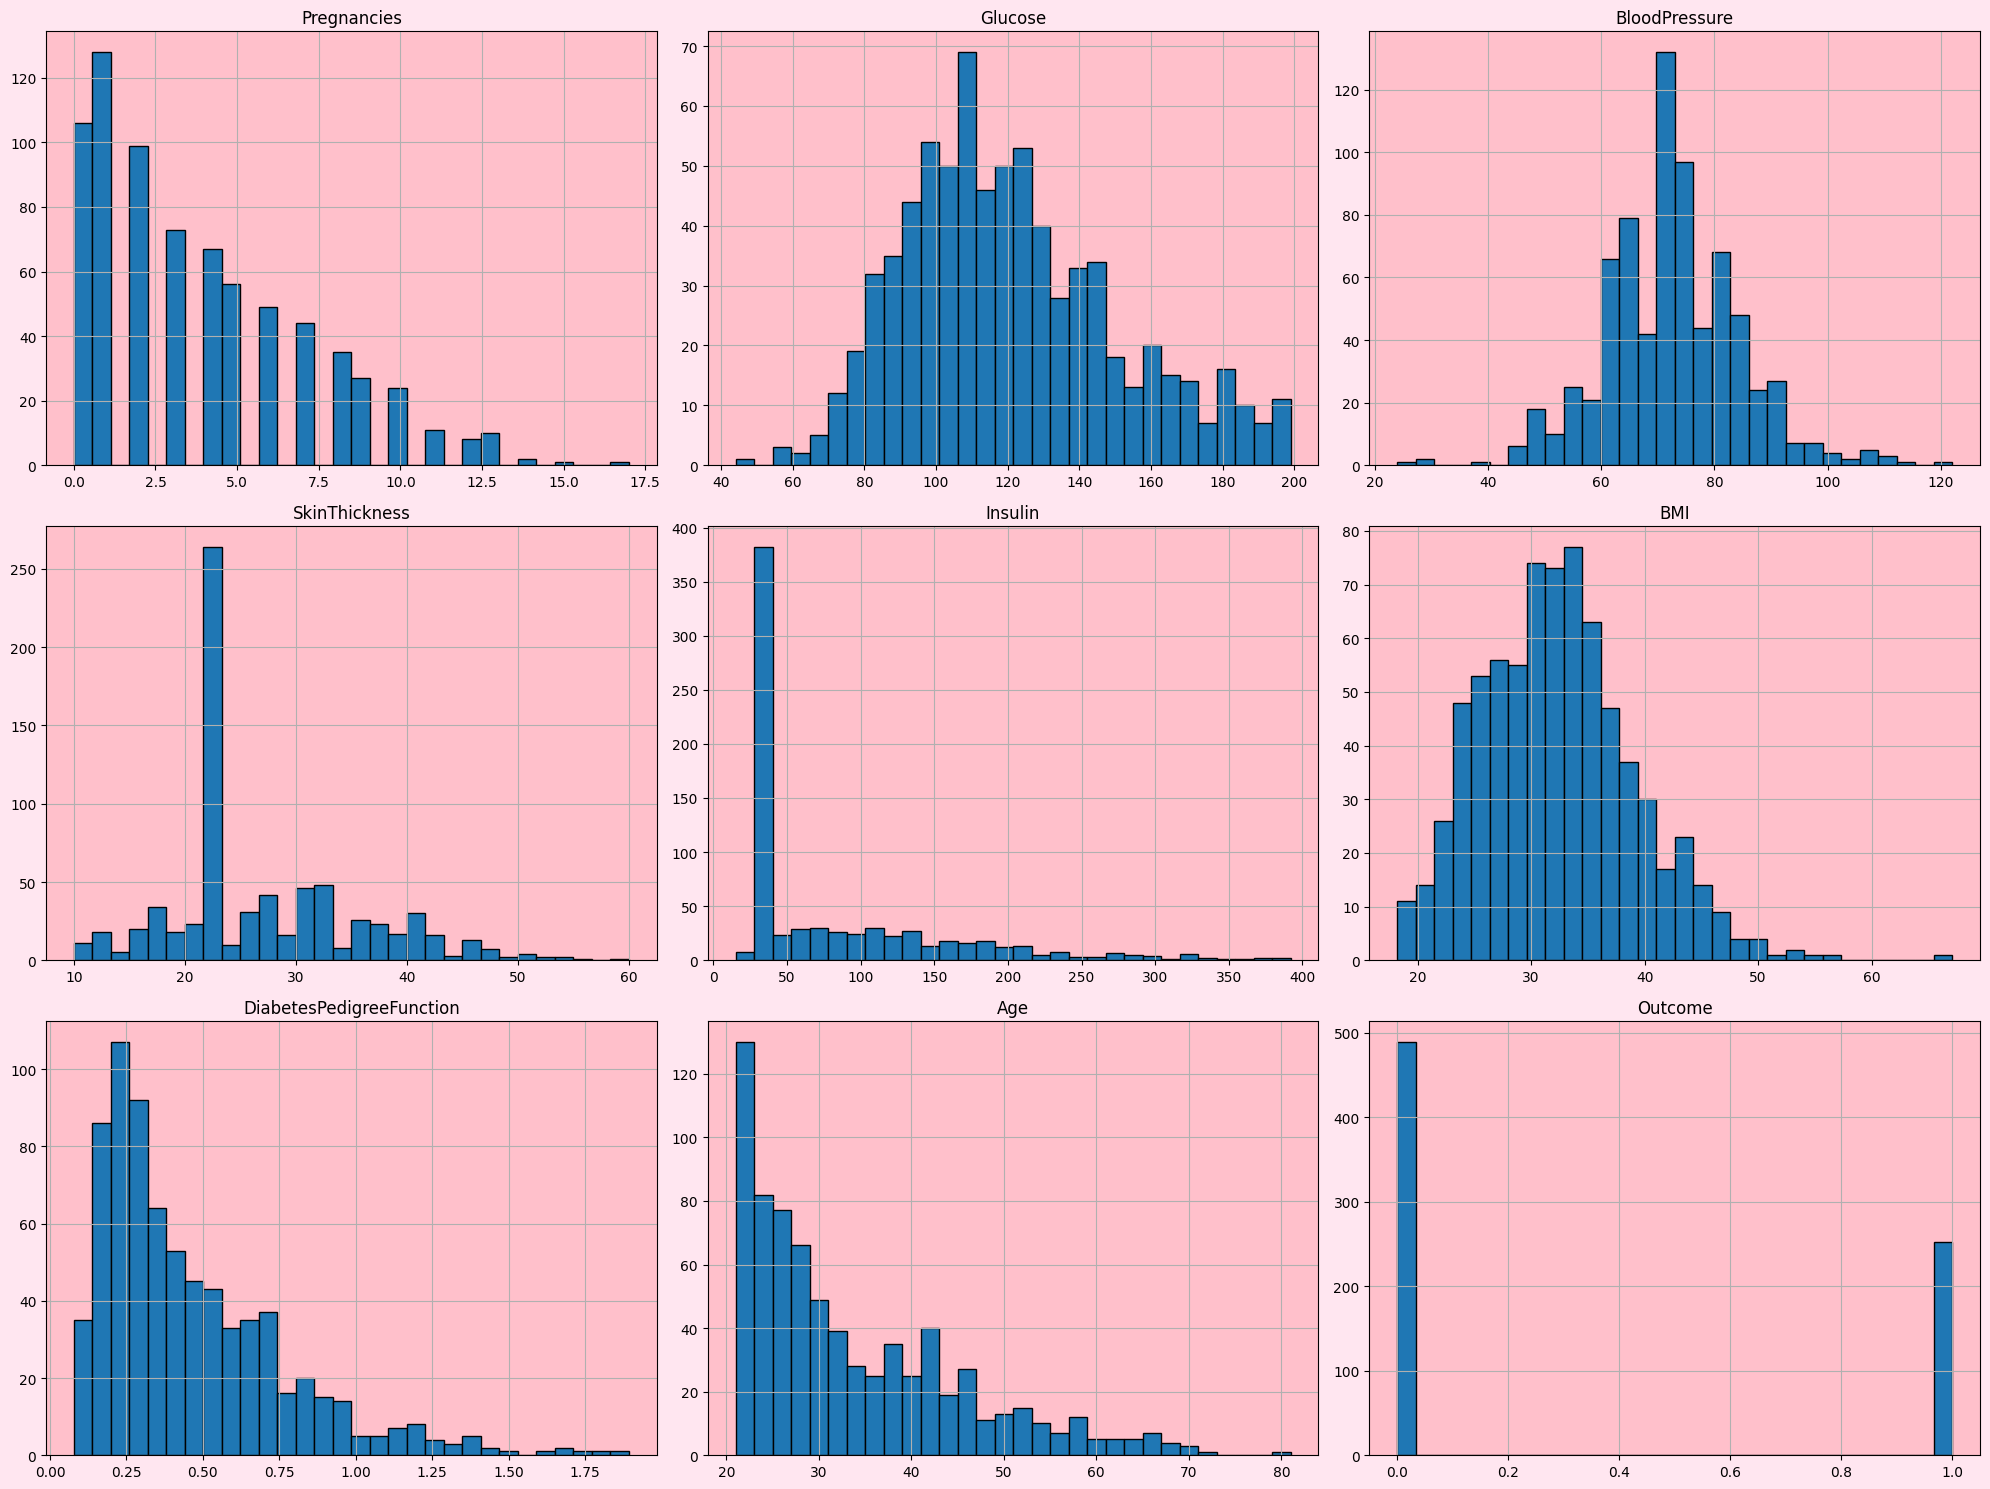

In [44]:
plt.style.use('default') 
fig = df.hist(figsize=(20, 15), bins=30, edgecolor='black')


for ax in fig.flatten():
    ax.set_facecolor('pink')  

plt.gcf().patch.set_facecolor('#ffe6f0') 

plt.tight_layout()
plt.show()

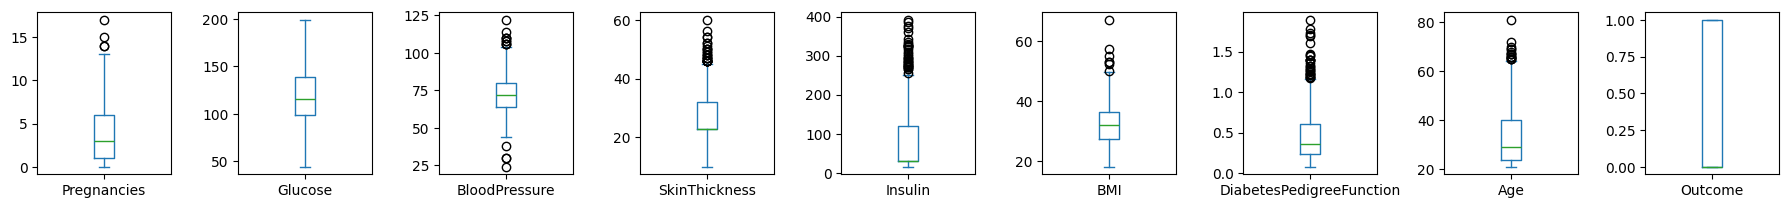

In [45]:
df.plot(kind='box', subplots=True, layout=(10, 10), figsize=(20, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

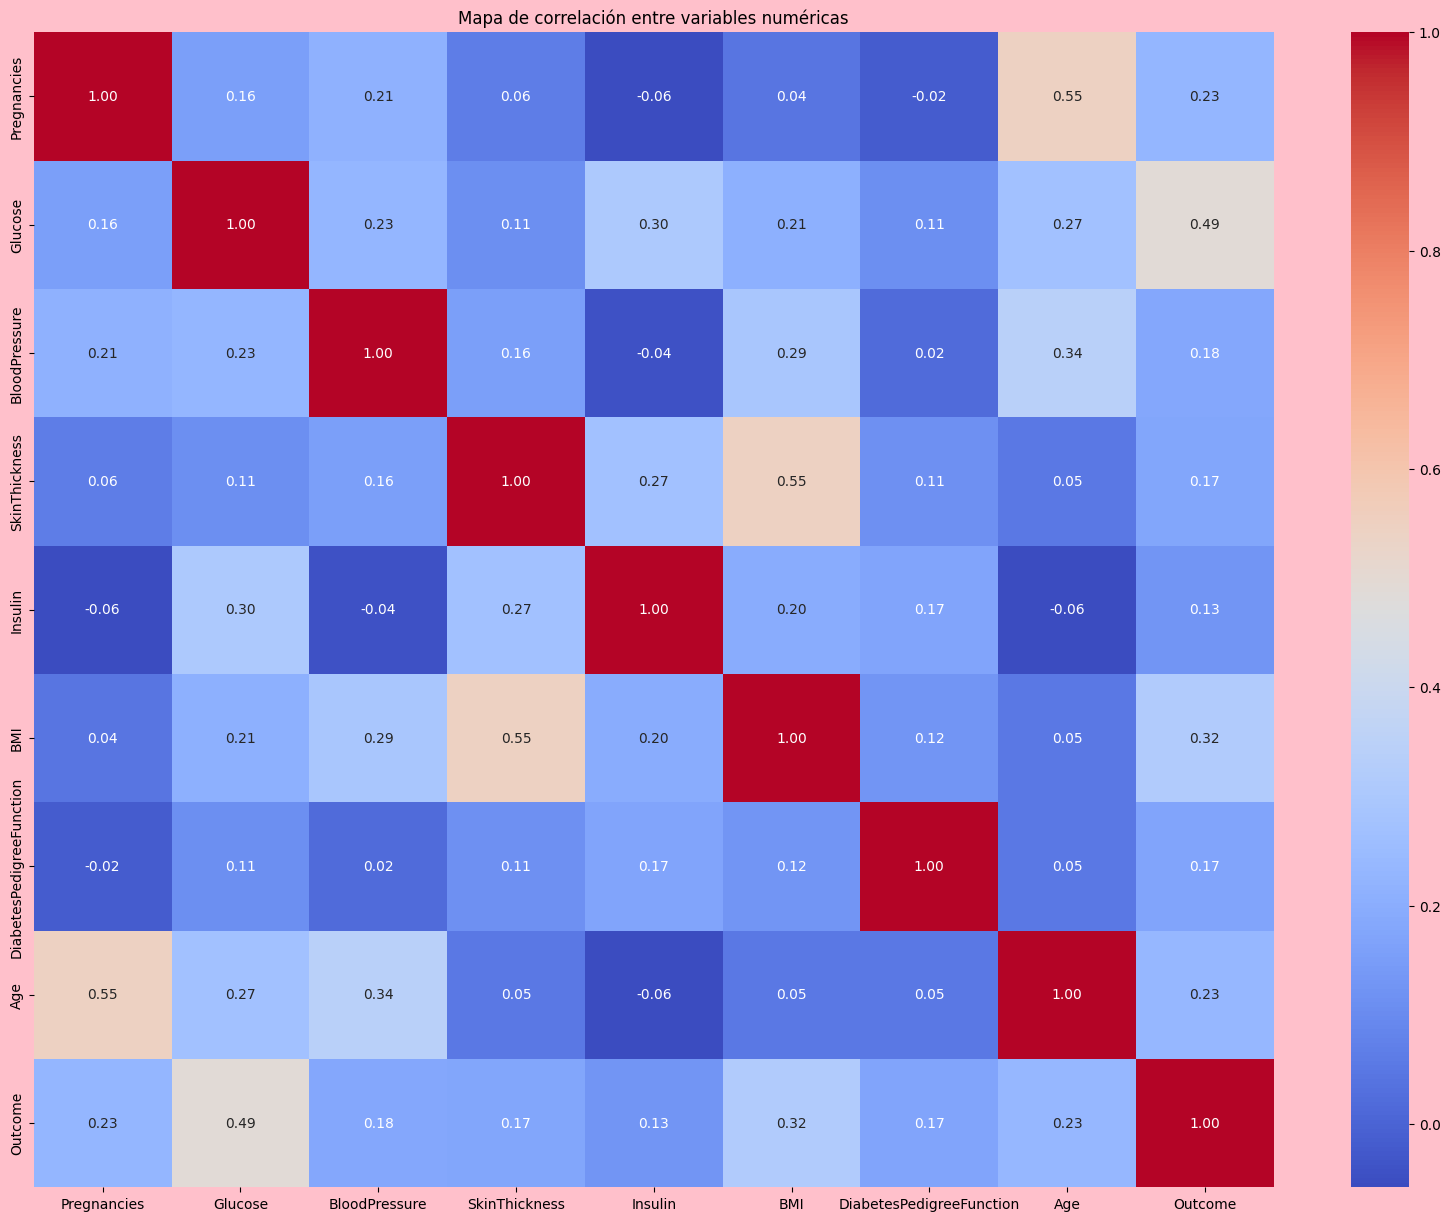

In [46]:
plt.figure(figsize=(20, 15),facecolor="pink")
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Mapa de correlación entre variables numéricas")
plt.show()

In [47]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

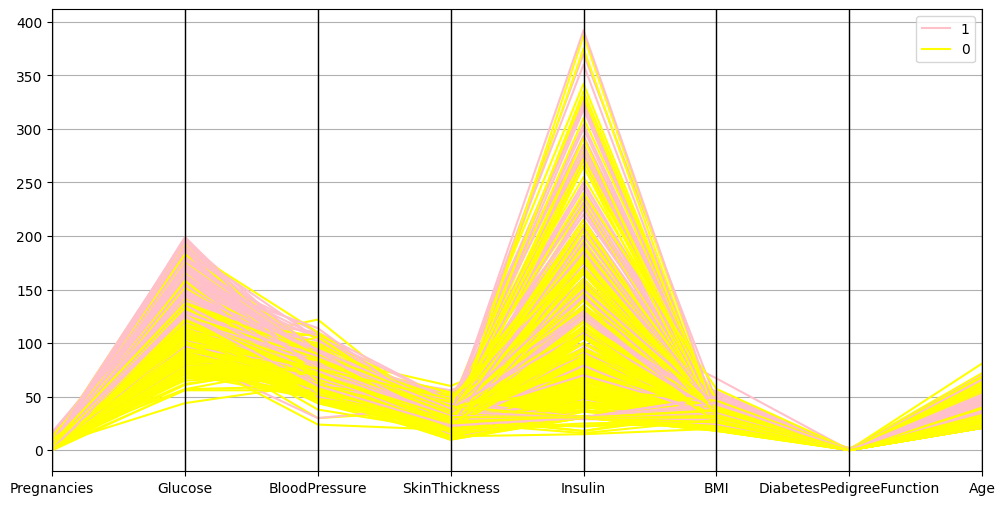

In [48]:
plt.figure(figsize=(12,6))
pd.plotting.parallel_coordinates(df, "Outcome", color = ("pink", "yellow"))
plt.show()

Split

In [49]:
X = df.drop("Outcome", axis=1)  
y = df["Outcome"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sel = X_train.copy() 
X_test_sel = X_test.copy()   


X_train_sel["Outcome"] = y_train.values 
X_test_sel["Outcome"] = y_test.values   


X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
500,2,117,90,19,71.0,25.2,0.313,21,0
303,5,115,98,23,30.5,52.9,0.209,28,1
442,4,117,64,27,120.0,33.2,0.230,24,0
179,5,130,82,23,30.5,39.1,0.956,37,1
139,5,105,72,29,325.0,36.9,0.159,28,0


In [50]:
X.shape

(741, 8)

In [51]:
y.unique()


array([1, 0])

In [52]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,117,90,19,71.0,25.2,0.313,21,0
1,5,115,98,23,30.5,52.9,0.209,28,1
2,4,117,64,27,120.0,33.2,0.230,24,0
3,5,130,82,23,30.5,39.1,0.956,37,1
4,5,105,72,29,325.0,36.9,0.159,28,0


Modelado

In [53]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
model.classes_

array([0, 1])

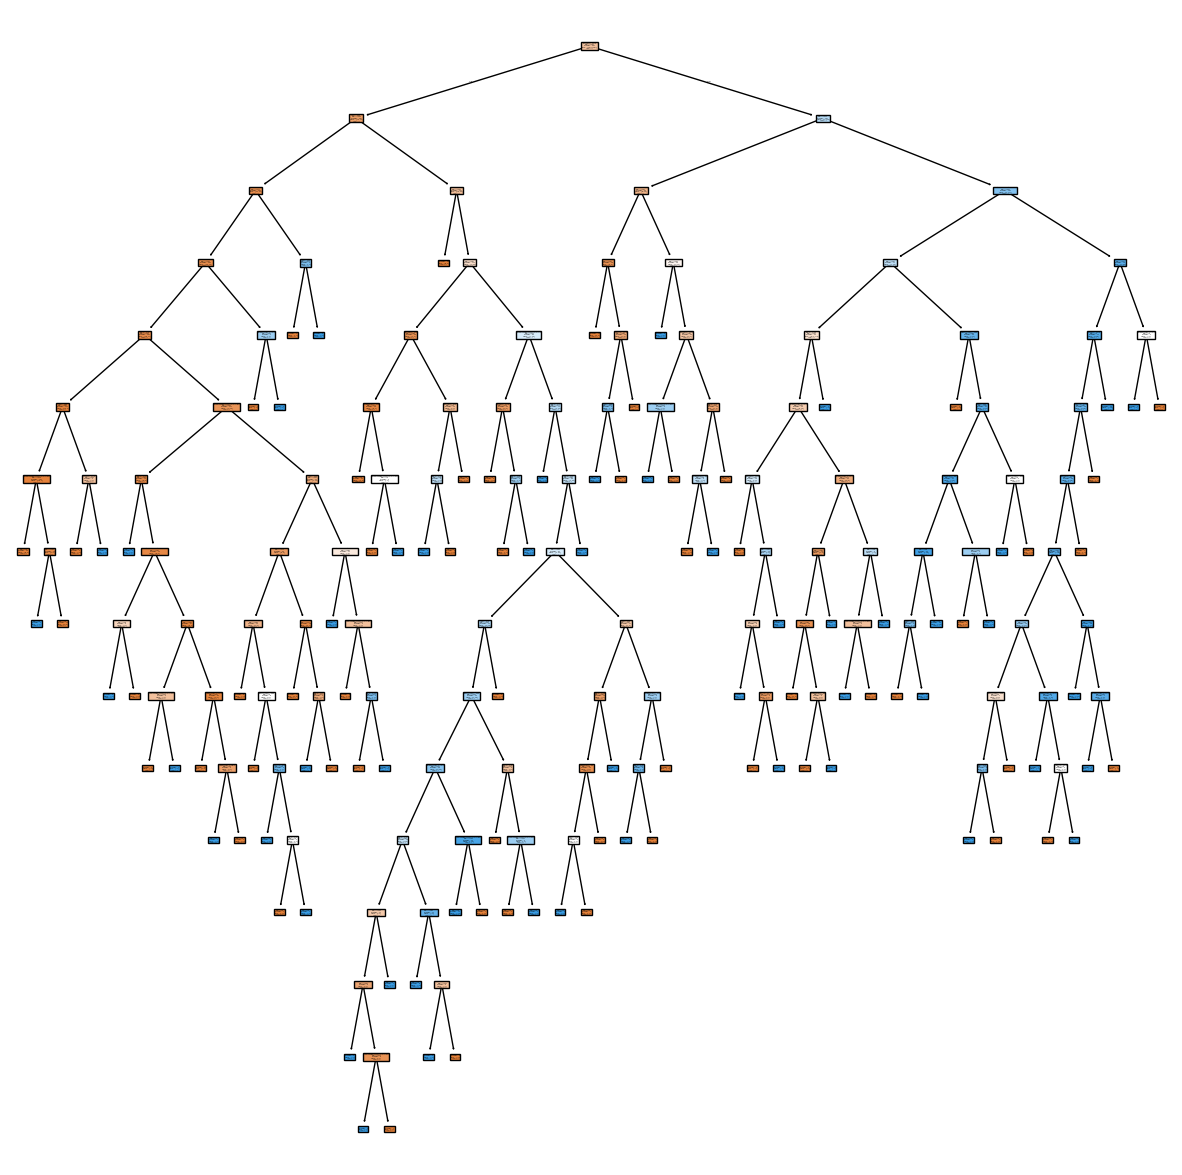

In [55]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=list(X_train.columns), class_names = ["0", "1"], filled = True)
plt.show()

In [56]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [57]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [58]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.6510067114093959
F1 score Test:  0.6510067114093959
Precision Test:  0.6510067114093959
Recall Test:  0.6510067114093959
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


In [59]:
print(classification_report(y_test, y_pred_test, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        95
           1       0.52      0.56      0.54        54

    accuracy                           0.65       149
   macro avg       0.63      0.63      0.63       149
weighted avg       0.66      0.65      0.65       149



In [60]:
accuracy_score(y_test, y_pred_test)

0.6510067114093959

In [61]:
dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

Model Optimization

In [62]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1,2,4]
 }

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [63]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
grid.fit(X_train, y_train)
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [64]:
model =DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [65]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [66]:
accuracy_score(y_test, y_pred)

0.7046979865771812

In [67]:
y_pred_optimizado = model.predict(X_test)

# Accuracy
accuracy_optimizado = accuracy_score(y_test, y_pred_optimizado)
print("Accuracy del modelo optimizado:", accuracy_optimizado)

# F1 Score (micro y macro para comparación)
f1_micro = f1_score(y_test, y_pred_optimizado, average='micro')
f1_macro = f1_score(y_test, y_pred_optimizado, average='macro')
print("F1 Score (micro):", f1_micro)
print("F1 Score (macro):", f1_macro)

# Reporte detallado
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_optimizado, target_names=["No Diabetes", "Diabetes"]))

Accuracy del modelo optimizado: 0.7046979865771812
F1 Score (micro): 0.7046979865771812
F1 Score (macro): 0.6829787234042553

Reporte de clasificación:
              precision    recall  f1-score   support

 No Diabetes       0.77      0.76      0.77        95
    Diabetes       0.59      0.61      0.60        54

    accuracy                           0.70       149
   macro avg       0.68      0.68      0.68       149
weighted avg       0.71      0.70      0.71       149



In [70]:


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
    'random_state': [42]
}
model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)


y_pred_optimizado = grid_search.best_estimator_.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, classification_report

accuracy_optimizado = accuracy_score(y_test, y_pred_optimizado)

f1_micro_optimizado = f1_score(y_test, y_pred_optimizado, average='micro')
f1_macro_optimizado = f1_score(y_test, y_pred_optimizado, average='macro')

report_optimizado = classification_report(y_test, y_pred_optimizado)

print(f"Accuracy del modelo optimizado: {accuracy_optimizado}")
print(f"F1 Score (micro): {f1_micro_optimizado}")
print(f"F1 Score (macro): {f1_macro_optimizado}")
print("\nReporte de clasificación:")
print(report_optimizado)

Mejores parámetros: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}
Accuracy del modelo optimizado: 0.7046979865771812
F1 Score (micro): 0.7046979865771812
F1 Score (macro): 0.6829787234042553

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        95
           1       0.59      0.61      0.60        54

    accuracy                           0.70       149
   macro avg       0.68      0.68      0.68       149
weighted avg       0.71      0.70      0.71       149



In [69]:
dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))